# 수행목표
- KMRD 데이터셋 사용자 데이터를 확인하고 시각화한다.
# 수행단계
- 사용자 탐색
    - 사용자별로 몇 편의 영화에 평점을 부여했는지 분포를 확인하라. (Histogram)
    - 사용자의 활동 패턴(예: 활동 기간, 평점 주기 패턴)을 탐색하라. (Line chart)
    - 사용자의 선호 장르를 파악할 수 있게 시각화하라. (Heatmap)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
movies = pd.read_csv('data/kmrd/movies.txt', sep='\t')  # 혹은 sep=','가 아니라 '\t'라면 tab 구분
rates = pd.read_csv('data/kmrd/rates.csv')
genres = pd.read_csv('data/kmrd/genres.csv')

In [3]:
user_rate_count = rates.groupby('user')['rate'].count()

user_rate_count

user
0        85
1         1
2        15
3        92
4        71
         ..
52023     1
52024     1
52025     1
52026     1
52027     1
Name: rate, Length: 52028, dtype: int64

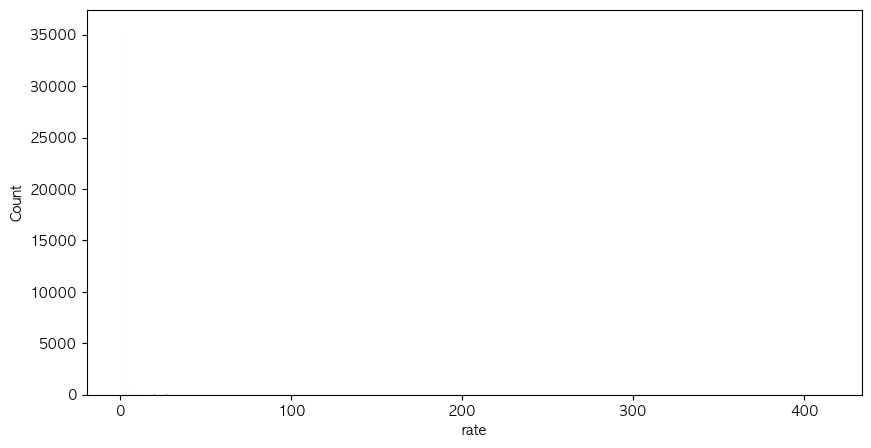

In [28]:
# 사용자별로 몇 편의 영화에 평점을 부여했는지 분포를 확인하라. (Histogram)

fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(user_rate_count, ax=ax)
# plt.xlim(0.5, 9.5)
plt.show()

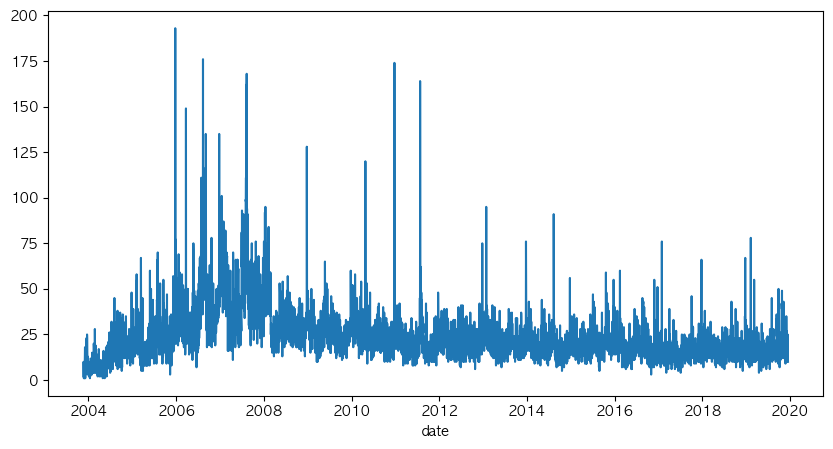

In [7]:
# 사용자의 활동패턴을 탐색하라 (lineplot)
# 날짜별 평점

rates['time'] = pd.to_datetime(rates['time'], unit='s')
rates['date'] = rates['time'].dt.date
rates['year'] = rates['time'].dt.year
rates['month'] = rates['time'].dt.month
rates['day'] = rates['time'].dt.day
rates['weekday'] = rates['time'].dt.weekday
rates['hour'] = rates['time'].dt.hour

rates['date'] = pd.to_datetime(rates['date'])
rates['date'] = rates['date'].dt.date

rates['date'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 5))
rates['date'].value_counts().sort_index().plot(ax=ax)
plt.show()


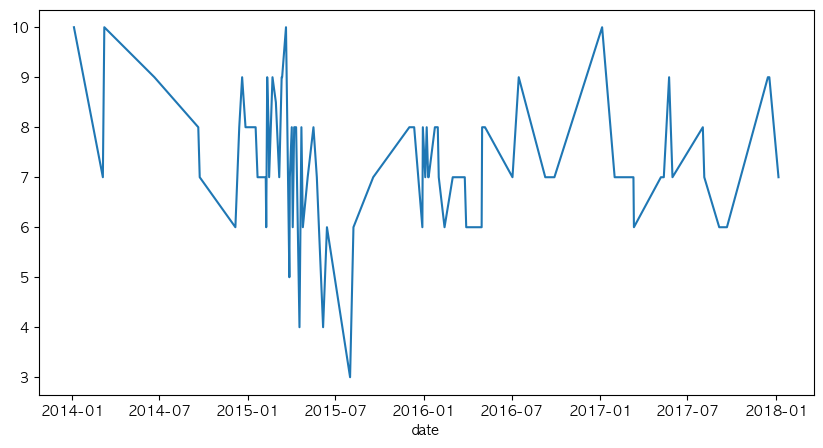

In [12]:
# 특정 사용자의 활동 패턴(날짜별 점수 평균)

user = 0

user_rates = rates[rates['user'] == user]
user_rates

fig, ax = plt.subplots(figsize=(10, 5))
user_rates.groupby('date')['rate'].mean().plot(ax=ax)
plt.show()



In [19]:
rates.groupby('user')['rate'].mean()

user
0         7.388235
1         9.000000
2         7.733333
3         7.413043
4         6.760563
           ...    
52023    10.000000
52024    10.000000
52025     7.000000
52026     9.000000
52027    10.000000
Name: rate, Length: 52028, dtype: float64

In [29]:
df_merged = pd.merge(rates, movies, on='movie')
df_merged = pd.merge(df_merged, genres, on='movie')

user_counts = rates['user'].value_counts()
top_users = user_counts.head(10).index  # 평점을 많이 남긴 top10
# top_users = rates.groupby('user')['rate'].count().head(20).index
# 위 10명만 필터링
df_top10 = df_merged[df_merged['user'].isin(top_users)]

df_top10


,user,movie,rate,time,date,year_x,month,day,weekday,hour,title,title_eng,year_y,grade,genre
2909,44,10001,5,2005-02-23 19:16:00,2005-02-23,2005,2,23,2,19,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가,드라마
2910,44,10001,5,2005-02-23 19:16:00,2005-02-23,2005,2,23,2,19,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가,멜로/로맨스
2911,44,10001,9,2006-06-28 16:29:00,2006-06-28,2006,6,28,2,16,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가,드라마
2912,44,10001,9,2006-06-28 16:29:00,2006-06-28,2006,6,28,2,16,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가,멜로/로맨스
2913,44,10001,10,2004-12-22 06:40:00,2004-12-22,2004,12,22,2,6,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가,드라마
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80208,2769,10970,8,2019-03-09 01:37:00,2019-03-09,2019,3,9,5,1,원스 어폰 어 타임 인 아메리카,"Once Upon A Time In America , 1984",2015.0,청소년 관람불가,느와르
80209,2769,10970,8,2019-03-09 01:37:00,2019-03-09,2019,3,9,5,1,원스 어폰 어 타임 인 아메리카,"Once Upon A Time In America , 1984",2015.0,청소년 관람불가,액션
80210,2769,10978,5,2017-11-08 02:28:00,2017-11-08,2017,11,8,2,2,학창 보고서,1987,1987.0,NR,드라마
80211,2769,10978,5,2017-11-08 02:28:00,2017-11-08,2017,11,8,2,2,학창 보고서,1987,1987.0,NR,코미디


In [30]:
user_counts.size, user_counts.idxmax()

(52028, np.int64(465))

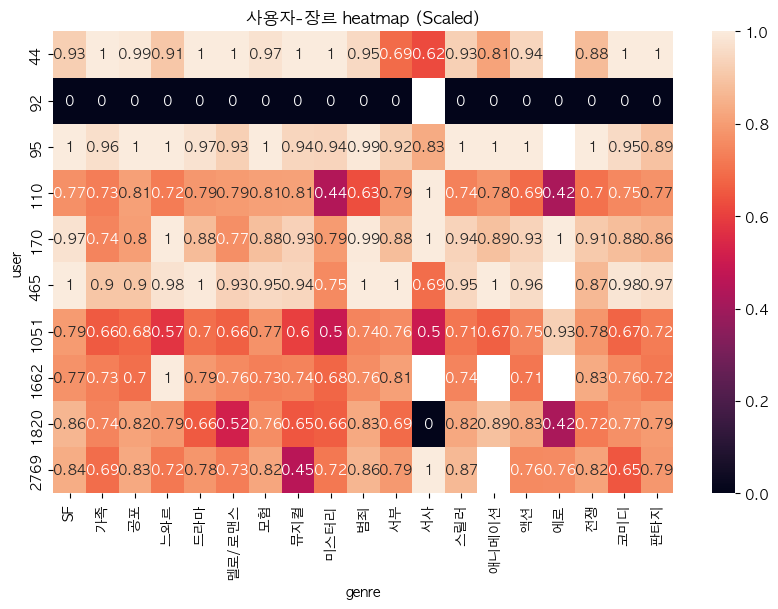

In [31]:
from sklearn.preprocessing import MinMaxScaler

pivot_ug = df_top10.pivot_table(index='user', columns='genre', values='rate', aggfunc='mean')

# pivot_ug (user x genre)의 값들을 MinMax 스케일링
scaler = MinMaxScaler()
pivot_ug_scaled = scaler.fit_transform(pivot_ug)  # numpy array로 반환

# 다시 DataFrame으로
pivot_ug_scaled_df = pd.DataFrame(pivot_ug_scaled, columns=pivot_ug.columns, index=pivot_ug.index)

# 시각화 예시
plt.figure(figsize=(10,6))
sns.heatmap(pivot_ug_scaled_df, annot=True)#, cmap='Blues')
plt.title('사용자-장르 heatmap (Scaled)')
plt.show()


In [53]:
# 사용자의 활동 패턴(예: 활동 기간, 평점 주기 패턴)을 탐색하라. (Line chart)

# 사용자별로 평점을 매긴 날짜의 최소, 최대를 구하고 차이를 계산

user_rate_dates = rates.groupby('user')['time'].agg(['min', 'max'])
user_rate_dates['diff'] = user_rate_dates['max'] - user_rate_dates['min']

user_rate_dates

,min,max,diff
user,,,
0,1388915880,1515239220,126323340
1,1408888020,1408888020,0
2,1310563440,1337733600,27170160
3,1357253640,1437311100,80057460
4,1384691160,1555482120,170790960
...,...,...,...
52023,1421679660,1421679660,0
52024,1204622460,1204622460,0
52025,1498546920,1498546920,0
